## Setup

In [2]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Data Processing and Exploration

In [11]:
file = tf.keras.utils
raw_df = pd.read_csv('/Users/saifmohammed/Downloads/DiaHealth_Diabetes Dataset (1).csv')
raw_df.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No


In [15]:
raw_df.describe()

,age,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke
count,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000
mean,45.533750,76.768990,133.859849,82.064742,7.540682,1.548571,53.626816,22.472301,0.037337,0.109803,0.039544,0.011587,0.003678
std,14.321155,12.290076,22.293015,12.489593,2.923080,0.080955,10.091550,8.778764,0.189603,0.312673,0.194903,0.107029,0.060545
min,8.000000,5.000000,62.000000,45.000000,0.000000,0.360000,3.000000,1.220000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,69.000000,119.000000,73.000000,6.000000,1.520000,46.700000,19.630000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,76.000000,130.000000,81.000000,6.920000,1.550000,53.000000,21.870000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,84.000000,147.000000,90.000000,8.120000,1.600000,59.900000,24.490000,0.000000,0.000000,0.000000,0.000000,0.000000
max,112.000000,133.000000,231.000000,119.000000,33.460000,1.960000,100.700000,574.130000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
raw_df.isnull().sum()

age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64

<Axes: xlabel='age'>

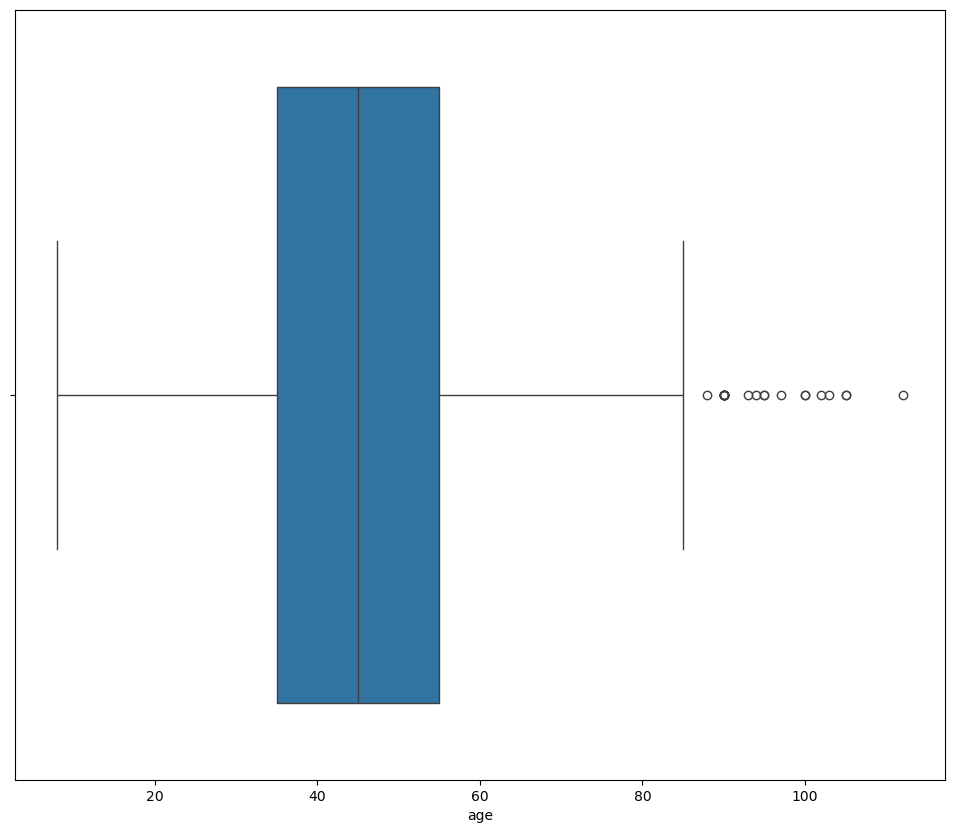

In [28]:
sns.boxplot(x=raw_df['age'])

In [36]:
Q1 = raw_df['age'].quantile(0.25)
Q3 = raw_df['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Filter the outlier values in the 'age' column
outliers = raw_df[(raw_df['age'] < lower_bound) | (raw_df['age'] > upper_bound)]

# Display the outlier values
outliers

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
360,90,Female,60,222,111,7.58,1.60,58.2,22.73,0,1,0,0,0,No
404,90,Male,68,180,76,8.44,1.65,70.3,25.79,0,1,0,1,0,No
487,97,Male,121,143,88,8.68,1.55,49.4,20.58,0,0,0,0,0,No
633,94,Female,81,187,86,5.12,1.32,24.5,14.04,0,0,0,0,0,No
713,105,Male,78,160,85,9.77,1.63,45.0,17.03,0,0,0,0,0,No
768,90,Male,63,132,59,7.77,1.52,48.0,20.67,0,0,0,0,0,No
887,90,Male,93,179,95,6.40,1.47,25.5,11.75,0,0,0,0,0,No
1250,95,Male,71,148,75,7.20,1.60,65.8,25.70,0,0,0,0,0,No
1769,105,Female,90,153,77,8.64,1.47,36.0,16.59,0,0,0,0,0,No
1862,93,Male,79,110,67,8.32,1.65,58.0,21.28,0,0,0,0,0,No


In [40]:
# Filter the non-outlier values in the 'age' column
non_outliers = raw_df[(raw_df['age'] >= lower_bound) & (raw_df['age'] <= upper_bound)]

# Display the non-outlier values
non_outliers

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,Male,83,164,89,6.47,1.60,64.0,24.99,0,1,0,1,0,No
5433,75,Male,67,141,104,8.31,1.65,62.0,22.75,0,0,0,0,0,Yes
5434,40,Female,67,134,114,7.61,1.50,69.0,30.72,0,1,0,0,1,No
5435,36,Female,62,139,80,4.90,1.52,41.5,17.87,0,0,0,0,0,No


## Examine Class Level Imbalance

In [22]:
No, Yes = np.bincount(raw_df['diabetic'])
total = No + Yes
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, Yes, 100 * Yes / total))

ValueError: invalid literal for int() with base 10: 'No'